In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score
import plotly.express as px

In [ ]:
Train = pd.read_csv("/content/Train.csv")
Test = pd.read_csv("/content/Test.csv")

In [ ]:
def convertir_columna_a_numeros(columna):
    valores_unicos = columna.dropna().unique()
    mapping = {valor: indice for indice, valor in enumerate(valores_unicos)}
    return columna.map(mapping)

def convertir_dataframe(df, columnas):
    for col in columnas:
        df[col] = convertir_columna_a_numeros(df[col].astype(str))
    return df

def OneHot(X):
    Enc = preprocessing.OneHotEncoder(sparse_output=False)
    X_new = Enc.fit_transform(X)
    return X_new, Enc.get_feature_names_out()

def Ordinal(X):
    Enc = preprocessing.OrdinalEncoder()
    X_new = Enc.fit_transform(X)
    return X_new, Enc.get_feature_names_out()

def convertir_dataframe_One(df, columnas):
    df_final = df.copy()
    for col in columnas:
        one_hot_encoded, feature_names = OneHot(df[[col]])
        df_one_hot = pd.DataFrame(one_hot_encoded, columns=feature_names, index=df.index)
        df_final = pd.concat([df_final.drop(columns=[col]), df_one_hot], axis=1)
    return df_final

def convertir_dataframe_Ordinal(df, columnas):
    df_final = df.copy()
    for col in columnas:
        Ordinal_encoded, feature_names = Ordinal(df[[col]])
        df_Ordinal = pd.DataFrame(Ordinal_encoded, columns=feature_names, index=df.index)
        df_final = pd.concat([df_final.drop(columns=[col]), df_Ordinal], axis=1)
    return df_final

def Scale(df):
    escalador = preprocessing.MaxAbsScaler()
    columnas = df.columns
    for col in columnas:
        if df[col].dtype != "object":
            df[col] = escalador.fit_transform(df[col].values.reshape(-1, 1))
    return df

def Standar(df):
    escalador = preprocessing.StandardScaler()
    columnas = df.columns
    for col in columnas:
        if df[col].dtype != "object":
            df[col] = escalador.fit_transform(df[col].values.reshape(-1, 1))
    return df

def Scale_Min(df):
    escalador = preprocessing.MinMaxScaler()
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = escalador.fit_transform(df[numeric_columns])
    return df

In [ ]:
Train = Train.drop(["Employee_ID", "Hometown"], axis=1)
Test = Test.drop(["Employee_ID", "Hometown"], axis=1)
columnas_convertir = ["Gender", "Relationship_Status"]
Train = Scale(Train)
Train = Train.dropna(how='any')
Test = Test.fillna(0)
Train = convertir_dataframe(Train, columnas_convertir)
Test = convertir_dataframe(Test, columnas_convertir)
columnas_OneHot = ["Unit","Decision_skill_possess","Compensation_and_Benefits"]
Train = convertir_dataframe_One(Train, columnas_OneHot)
Test = convertir_dataframe_One(Test, columnas_OneHot)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

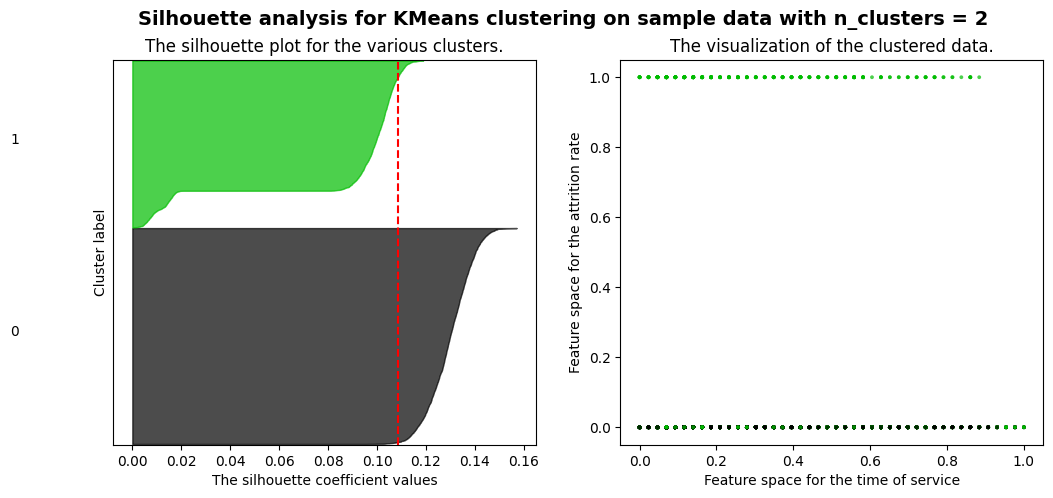

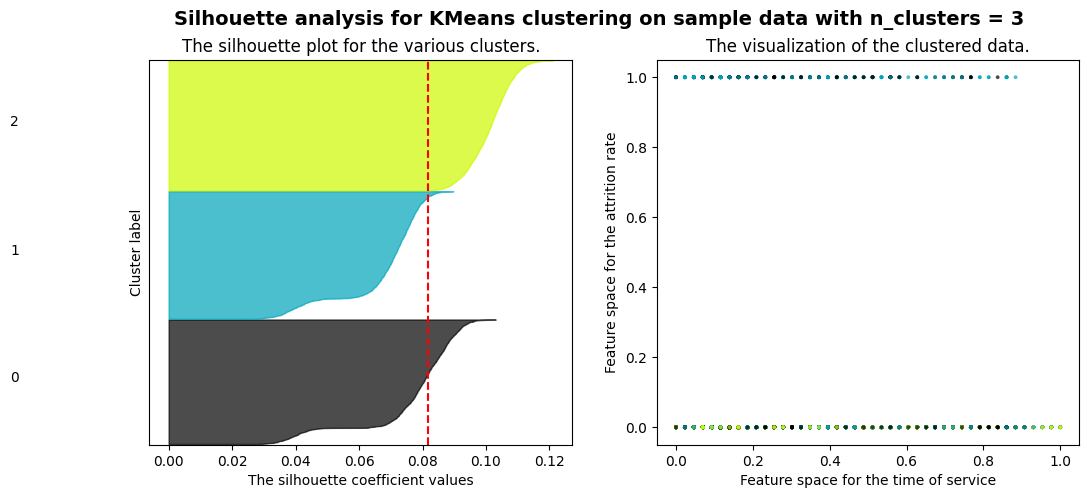

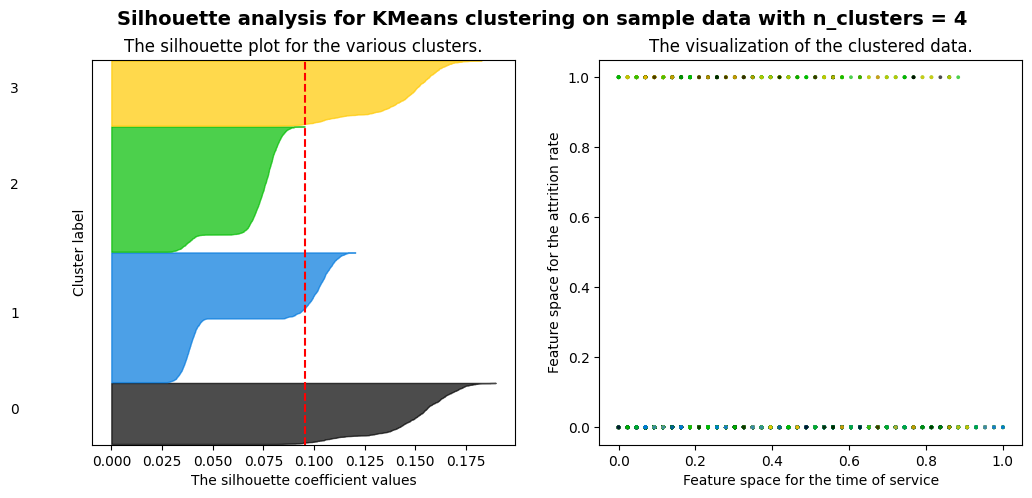

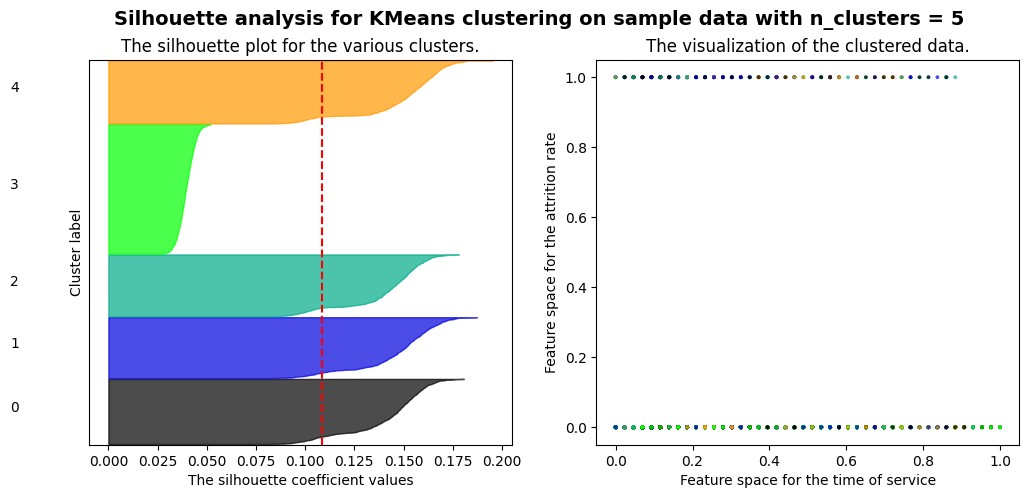

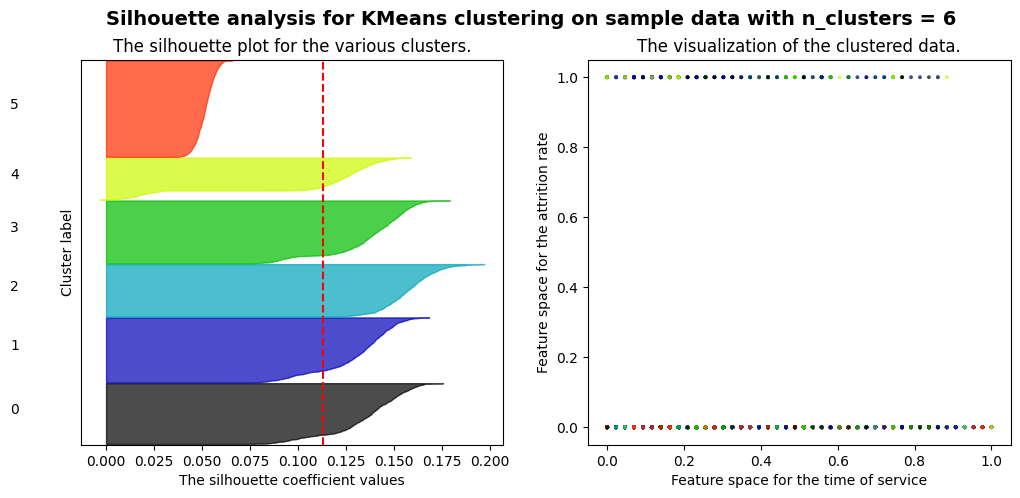

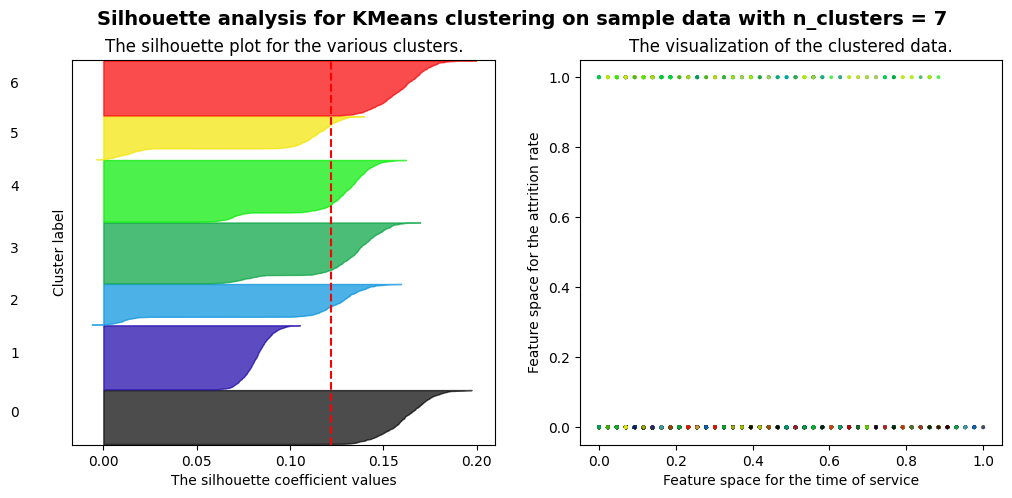

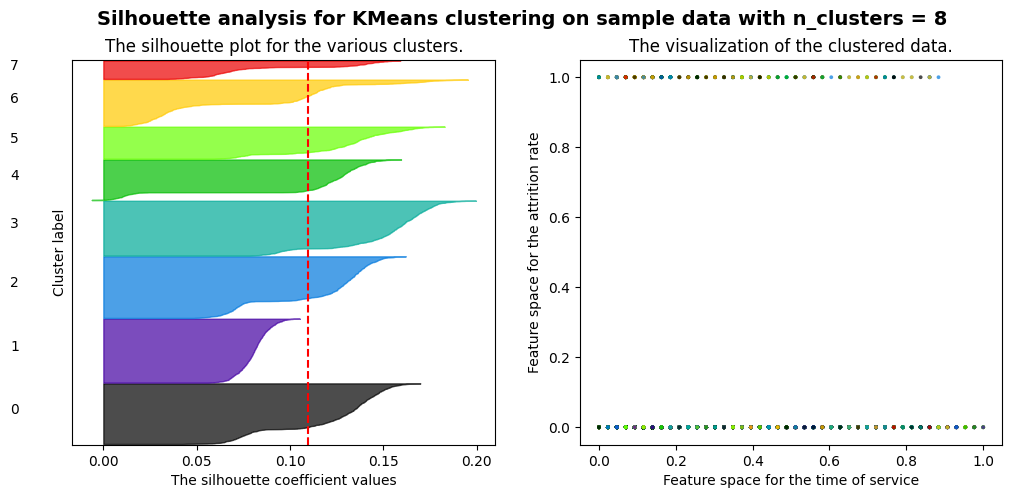

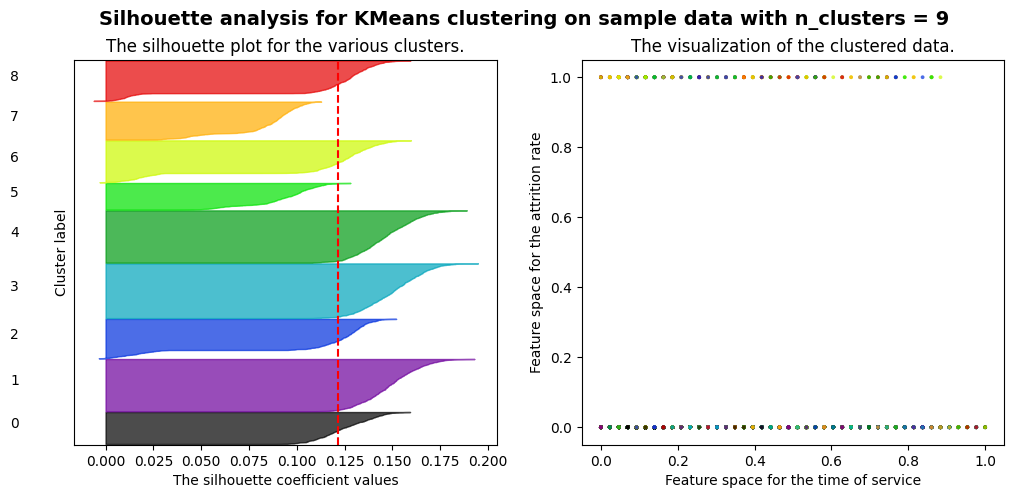

In [ ]:
X = Train.values

for k in range(2, 10):
    fig, (ax0, ax1) = plt.subplots(1, 2)
    fig.set_size_inches(12, 5)
    ax0.set_ylim([0, len(X) + (k + 1) * 10])

    k_means = KMeans(n_clusters=k, random_state=10)
    y_pred = k_means.fit_predict(X)

    silhouette_avg = silhouette_score(X, y_pred)
    sample_silhouette_values = silhouette_samples(X, y_pred)

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax0.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax0.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax0.set_title("The silhouette plot for the various clusters.")
    ax0.set_xlabel("The silhouette coefficient values")
    ax0.set_ylabel("Cluster label")

    ax0.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax0.set_yticks([])

    colors = cm.nipy_spectral(y_pred.astype(float) / k)
    ax1.scatter(X[:,4], X[:,-1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    ax1.set_title("The visualization of the clustered data.")
    ax1.set_xlabel("Feature space for the time of service")
    ax1.set_ylabel("Feature space for the attrition rate")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

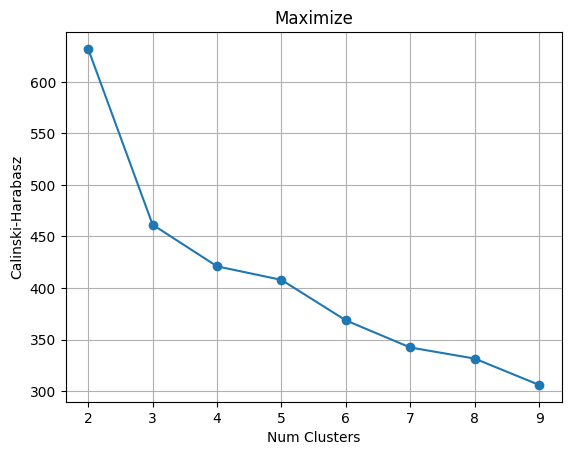

In [ ]:
X = Train.values
y_preds = []
results = {}

for k in range (2,10):
    k_means = KMeans(n_clusters = k).fit(X)
    y_pred = k_means.predict(X)
    y_preds.append(y_pred)
    results[k] = calinski_harabasz_score(X, y_pred)

clusters_counts = list(results.keys())
index_values = list(results.values())

plt.plot(clusters_counts, index_values, 'o-')
plt.grid(True)
plt.title("Maximize")
plt.xlabel("Num Clusters")
plt.xticks(clusters_counts)
plt.ylabel("Calinski-Harabasz")
plt.show()

In [ ]:
X = Train.values
y_preds = []
k_means = KMeans(n_clusters = 5).fit(X)
y_pred = k_means.predict(X)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 1, ..., 0, 3, 0], dtype=int32)

In [ ]:
Train["Group"] = y_pred
Train["Group"]

0       1
1       2
2       1
4       4
5       1
       ..
6995    4
6996    2
6997    0
6998    3
6999    0
Name: Group, Length: 5353, dtype: int32

In [ ]:
Data = [Train[Train["Group"] == k] for k in range(5)]

Data_segmentation = pd.DataFrame()
Data_segmentation["Features"] = Train.columns[:-1]
for k in range(5):
    row = []
    for col in Data_segmentation["Features"]:
        if Data[k][col].dtype != "object":
            row.append(np.round(Data[k][col].mean(), 2))
        else:
            row.append(np.round(Data[k][col].value_counts().keys()[0], 2))
    Data_segmentation["Group"+str(k)] = row

Data_segmentation

,Features,Group0,Group1,Group2,Group3,Group4
0,Gender,0.41,0.41,0.41,0.41,0.42
1,Age,0.62,0.62,0.60,0.61,0.61
2,Education_Level,0.64,0.63,0.64,0.64,0.63
3,Relationship_Status,0.34,0.38,0.36,0.33,0.37
4,Time_of_service,0.32,0.32,0.30,0.31,0.32
5,Time_since_promotion,0.60,0.58,0.59,0.60,0.59
6,growth_rate,0.64,0.64,0.64,0.62,0.63
7,Travel_Rate,0.41,0.42,0.40,0.40,0.41
8,Post_Level,0.55,0.56,0.56,0.56,0.56
9,Pay_Scale,0.61,0.60,0.60,0.60,0.61


In [ ]:
df = Data_segmentation.transpose()
df.columns = df.loc['Features']
df = df.drop('Features')
df = df[df.columns]

In [ ]:
df = df.reset_index().rename(columns={'index': 'Group'})

df_melted = df.melt(id_vars=['Group'], var_name='variable', value_name='value')

fig = px.box(df_melted, x='Group', y='value', color='variable',
             title='Variable Boxplot Grouped', labels={'value': 'normalized values'})

fig.show()

In [ ]:
df = Scale_Min(df)

df_melted = df.melt(id_vars=['Group'], var_name='variable', value_name='value')


fig = px.bar(df_melted, x='Group', y='value', color='variable',
             title='Variable Bar Plot Grouped', labels={'value': 'normalized values'},
             barmode='group')

fig.show()

De acuerdo a los resultados, el mejor agrupamiento se logra al tener 5 grupos, sin embargo, los resultados arrojados fueron incluyentes pues no se mostraron diferencias signficativas entre los grupos tal que se pueda saber que caracteristicas son aquellas que llevan a la deserción, el analisis fue realizado con el metodo KMeans por petición, sin embargo, y considerando la base de datos proporcionada, sueguiero un analisis con metodos de predicción tal como el KNN, esto a partir de transformar la variable Attrition_rate a etiquetas, con el objetivo de cumplir el objetivo de predecir aquellas personas con altas probabilidades de deserción.

En caso de no ser posible el uso de un metodo de predicción, se recomienda darle mayor peso a traves de una ponderacion a la variable Attrition_rate como se muestra a continuación:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

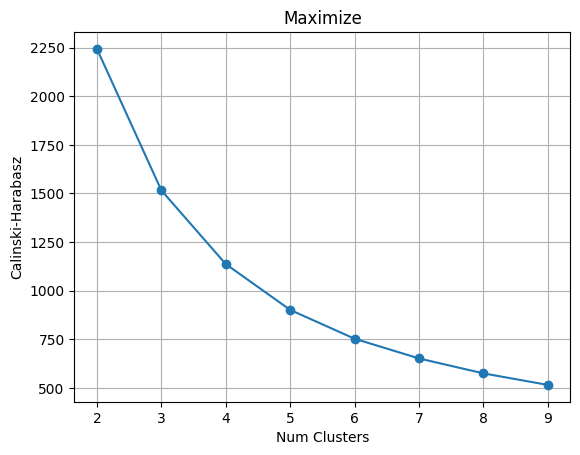

In [ ]:
Train = pd.read_csv("/content/Train.csv")
Test = pd.read_csv("/content/Test.csv")
Train = Train.drop(["Employee_ID", "Hometown"], axis=1)
Test = Test.drop(["Employee_ID", "Hometown"], axis=1)
columnas_convertir = ["Gender", "Relationship_Status"]
Train = Standar(Train)
Train = Train.dropna(how='any')
Test = Test.fillna(0)
Train = convertir_dataframe(Train, columnas_convertir)
Test = convertir_dataframe(Test, columnas_convertir)
columnas_OneHot = ["Unit","Decision_skill_possess","Compensation_and_Benefits"]
Train = convertir_dataframe_Ordinal(Train, columnas_OneHot)
Test = convertir_dataframe_One(Test, columnas_OneHot)


Train["Attrition_rate"] = Train["Attrition_rate"]

X = Train.values
y_preds = []
k_means = KMeans(n_clusters = 4).fit(X)
y_pred = k_means.predict(X)
y_pred

Train["Group"] = y_pred
Train["Group"]

X = Train.values
y_preds = []
results = {}

for k in range (2,10):
    k_means = KMeans(n_clusters = k).fit(X)
    y_pred = k_means.predict(X)
    y_preds.append(y_pred)
    results[k] = calinski_harabasz_score(X, y_pred)

clusters_counts = list(results.keys())
index_values = list(results.values())

plt.plot(clusters_counts, index_values, 'o-')
plt.grid(True)
plt.title("Maximize")
plt.xlabel("Num Clusters")
plt.xticks(clusters_counts)
plt.ylabel("Calinski-Harabasz")
plt.show()

Data = [Train[Train["Group"] == k] for k in range(4)]

Data_segmentation = pd.DataFrame()
Data_segmentation["Features"] = Train.columns[:-1]
for k in range(4):
    row = []
    for col in Data_segmentation["Features"]:
        if Data[k][col].dtype != "object":
            row.append(np.round(Data[k][col].mean(), 2))
        else:
            row.append(np.round(Data[k][col].value_counts().keys()[0], 2))
    Data_segmentation["Group"+str(k)] = row

df = Data_segmentation.transpose()
df.columns = df.loc['Features']
df = df.drop('Features')
df = df[df.columns]

df = df.reset_index().rename(columns={'index': 'Group'})


df_melted = df.melt(id_vars=['Group'], var_name='variable', value_name='value')


fig = px.bar(df_melted, x='Group', y='value', color='variable',
             title='Variable Bar Plot Grouped', labels={'value': 'normalized values'},
             barmode='group')

fig.show()

De esta manero podemos observar con mayor facilidad que las caracterizticas presnetes en el grupo 2 son aquellas que llevan a una desercion.

In [ ]:
Data = [Train[Train["Group"] == k] for k in range(4)]

Data_segmentation = pd.DataFrame()
Data_segmentation["Features"] = Train.columns[:-1]
for k in range(4):
    row = []
    for col in Data_segmentation["Features"]:
        if Data[k][col].dtype != "object":
            row.append(np.round(Data[k][col].mean(), 2))
        else:
            row.append(np.round(Data[k][col].value_counts().keys()[0], 2))
    Data_segmentation["Group"+str(k)] = row

Data_segmentation

,Features,Group0,Group1,Group2,Group3
0,Gender,0.41,0.42,0.43,0.40
1,Age,-0.01,1.10,-0.68,-0.01
2,Education_Level,0.04,-0.05,0.02,-0.03
3,Relationship_Status,0.37,0.36,0.35,0.35
4,Time_of_service,-0.01,1.10,-0.68,-0.01
5,Time_since_promotion,-0.03,0.18,-0.10,-0.00
6,growth_rate,0.01,-0.01,-0.01,0.00
7,Travel_Rate,-0.01,-0.03,0.00,-0.00
8,Post_Level,-0.03,0.00,-0.01,0.02
9,Pay_Scale,0.05,0.04,-0.03,-0.01
